#Data Set Up

In [1]:
#Read in data
import pandas as pd
x_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
x_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

In [4]:
#Installation
!pip install interpret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 38.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 15.3 MB/s eta 0:00:00


# Base Models

In [5]:
from pandas.core.window.rolling import numba_notes
#Regression Models
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor as XGBRegressor
#Linear Regression ( https://www.w3schools.com/python/python_ml_multiple_regression.asp )
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#Ridge Regression ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html )
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=.5)
#Lasso Regression ( https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d )
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
lasso = linear_model.Lasso(alpha=0.1)
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
#Random Forrest ( https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 )
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#Decision Trees ( https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16 )
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#SVM - SVR
from sklearn import svm
SVM = svm.SVR()
#Gradient Boosting Regressor ( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor )
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
# create an xgboost regression model: higher performance than gradient boosting
import xgboost as xg
xgb = xg.XGBRegressor()
#EBM Model
#interpretml
from interpret import show
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree
ebm = ExplainableBoostingRegressor()

In [6]:
model_names = ['Multiple Regression', 'Ridge Regression', 'Lasso Regression', 'KNeighborsRegressor', 'Random Forrest', 'Decision Trees', 'SVM - SVR', 'Gradient Boosting Regressor', 'XGBoost', 'EBM']
models = [lm, ridge, lasso, neigh, rf, dt, SVM, gbr, xgb, ebm]

In [7]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score

In [12]:
model_eval = []
for model in models:
  model.fit(x_train, y_train.values.ravel())
  predictions = model.predict(x_val)
  # Calculate model evaluation metrics
  mae = mean_absolute_error(y_val, predictions)
  mse = mean_squared_error(y_val, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_val, predictions)
  model_eval.append({'Model': model, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'RMSE': rmse,'R-squared': r2})

df = pd.DataFrame(model_eval)

In [13]:
df['Average Error']  = df[['Mean Absolute Error', 'Mean Squared Error', 'RMSE']].mean(axis=1)
ms = ['Linear Regression', 'Ridge Regression', 'Lasso', 'K-Nearest Regressor', 'Random Forrest', 'Decision Tree', 'Support Vector Machines', 'Gradient Boosting', 'XGBoost', 'EBM']
df.insert(1, 'Model_nice_name', ms)
df

,Model,Model_nice_name,Mean Absolute Error,Mean Squared Error,RMSE,R-squared,Average Error
0,LinearRegression(),Linear Regression,0.041829,0.004630,0.068047,0.546828,0.038169
1,Ridge(alpha=0.5),Ridge Regression,0.041827,0.004630,0.068047,0.546830,0.038168
2,Lasso(alpha=0.1),Lasso,0.066582,0.009231,0.096081,0.096518,0.057298
3,KNeighborsRegressor(n_neighbors=2),K-Nearest Regressor,0.018566,0.001215,0.034855,0.881098,0.018212
4,"(DecisionTreeRegressor(max_features=1.0, rando...",Random Forrest,0.011613,0.000387,0.019676,0.962110,0.010559
5,DecisionTreeRegressor(),Decision Tree,0.014297,0.000654,0.025566,0.936031,0.013506
6,SVR(),Support Vector Machines,0.078132,0.009935,0.099674,0.027679,0.062580
7,([DecisionTreeRegressor(criterion='friedman_ms...,Gradient Boosting,0.022052,0.001055,0.032478,0.896764,0.018528
8,"XGBRegressor(base_score=None, booster=None, ca...",XGBoost,0.013655,0.000446,0.021126,0.956321,0.011743
9,ExplainableBoostingRegressor(),EBM,0.017961,0.000749,0.027366,0.926707,0.015359


# Model Optimization

## 1. Linear Regression

In [ ]:
df.iloc[0]['Model']

LinearRegression()

In [ ]:
linr = linear_model.LinearRegression()
linr.fit(x_train, y_train)
pred = linr.predict(x_val)

Text(0, 0.5, 'y_test')

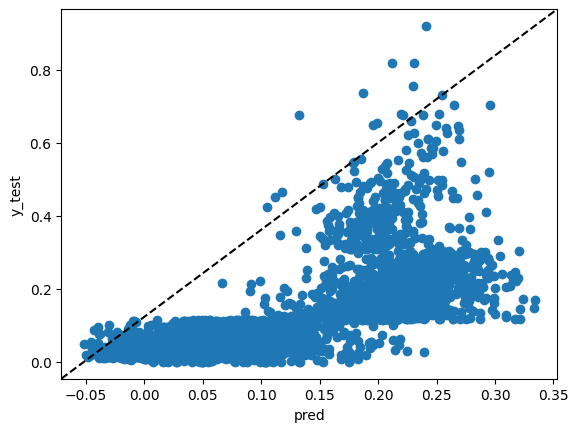

In [ ]:
pred = linr.predict(x_val)
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {linr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: LinearRegression(), MAE: 0.04182871690492889, MSE: 0.004630361496347768, RMSE: 0.06804675963150462


### Model Optimization

No model optimization for linear regression

## 2. Ridge Regression

In [ ]:
df.iloc[1]['Model']

Ridge(alpha=0.5)

In [ ]:
ridger = linear_model.Ridge()
ridger.fit(x_train, y_train)
pred = ridger.predict(x_val)

Text(0, 0.5, 'y_test')

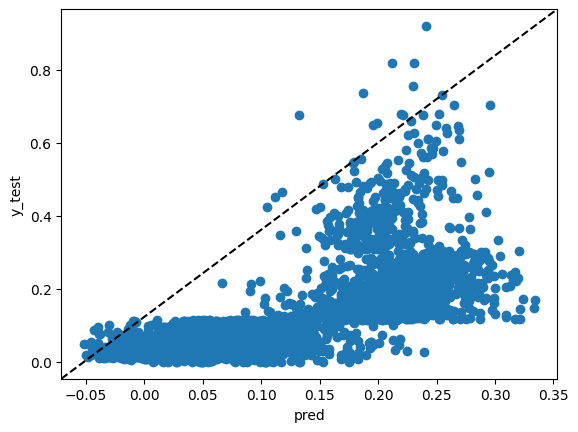

In [ ]:
pred = ridger.predict(x_val)
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {ridger}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: Ridge(), MAE: 0.041825030603392016, MSE: 0.004630324573099825, RMSE: 0.06804648832305621


### Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# grid search hyperparameters for ridge regression
from numpy import arange
model = linear_model.Ridge()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train)
print('MAE: %.6f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.043527
Config: {'alpha': 0.99}


In [ ]:
ridger = linear_model.Ridge(alpha=0.99)
ridger.fit(x_train, y_train)
pred = ridger.predict(x_val)

Text(0, 0.5, 'y_test')

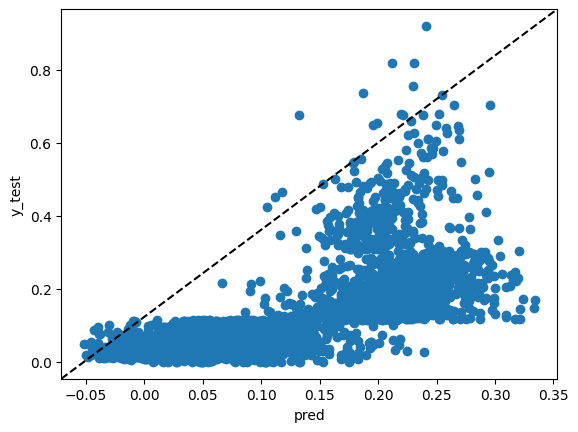

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: Ridge(), MAE: 0.041825067432623805, MSE: 0.004630324936440637, RMSE: 0.06804649099285456


## 3. Lasso Regression

In [ ]:
df.iloc[2]['Model']

Lasso(alpha=0.1)

In [ ]:
lass = linear_model.Lasso(alpha=0.1)
lass.fit(x_train, y_train)
pred = lass.predict(x_val)

Text(0, 0.5, 'y_test')

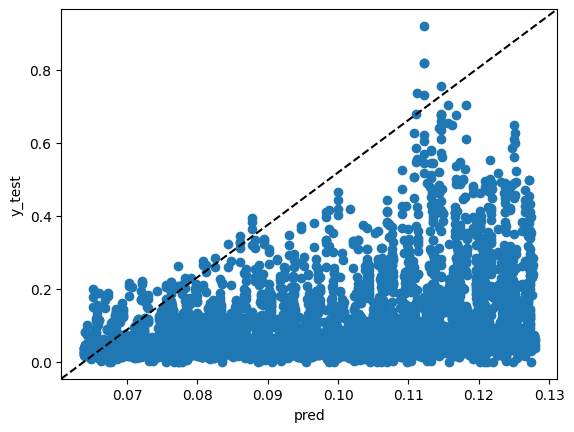

In [ ]:
pred = lass.predict(x_val)
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {lass}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: Lasso(alpha=0.1), MAE: 0.06658166506829111, MSE: 0.009231487561364667, RMSE: 0.0960806305212693


### Model Optimization

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
# grid search hyperparameters for ridge regression
from numpy import arange
model = linear_model.Lasso()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0.01, 1, 0.05)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(x_train, y_train.values.ravel())
print('MAE: %.6f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.046253
Config: {'alpha': 0.01}


In [17]:
lass = linear_model.Lasso(alpha=0.1)
lass.fit(x_train, y_train)
pred = lass.predict(x_val)

Text(0, 0.5, 'y_test')

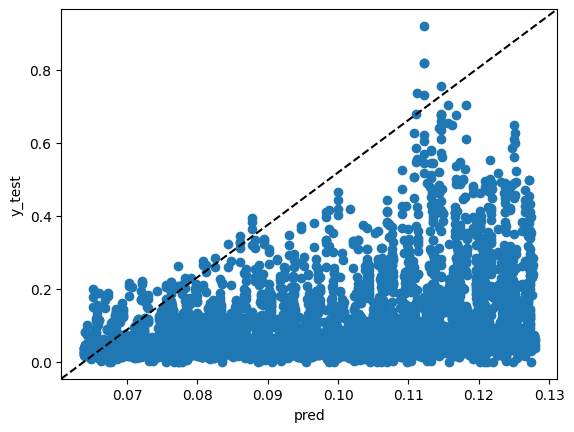

In [18]:
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [19]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [20]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: Lasso(), MAE: 0.06658166506829111, MSE: 0.009231487561364667, RMSE: 0.0960806305212693


## 4. K Neighbours

In [ ]:
df.iloc[3]['Model']

KNeighborsRegressor(n_neighbors=2)

In [ ]:
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train, y_train)
pred = knr.predict(x_val)

Text(0, 0.5, 'y_test')

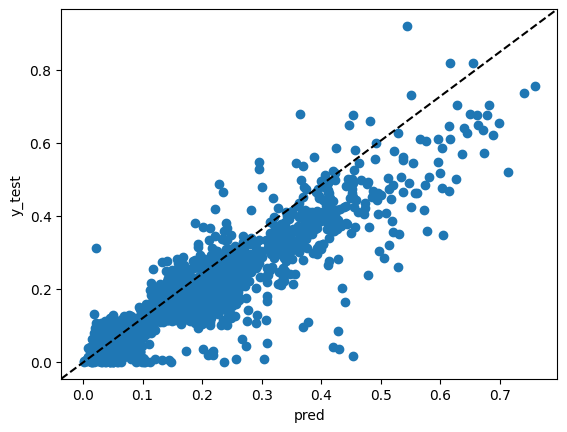

In [ ]:
pred = knr.predict(x_val)
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=2), MAE: 0.01856563453097723, MSE: 0.001214905348600828, RMSE: 0.034855492373524546


### Model Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold

params = {'n_neighbors':[2,3,4,5,6,7,8,9], 'weights': ['uniform', 'distance']}
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=cv)
results = model.fit(x_train,y_train)

print('R^2: %.6f' % results.best_score_)
print('Config: %s' % results.best_params_)

R^2: 0.892244
Config: {'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
knr = KNeighborsRegressor(n_neighbors= 3, weights= 'distance')
knr.fit(x_train, y_train)
pred = knr.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {knr}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: KNeighborsRegressor(n_neighbors=3, weights='distance'), MAE: 0.018234904440547893, MSE: 0.0011430408868409864, RMSE: 0.03380888769008804


## 5. Random Forrest

In [ ]:
df.iloc[4]['Model']

RandomForestRegressor()

In [21]:
model = RandomForestRegressor()
model.fit(x_train, y_train.values.ravel())
pred = model.predict(x_val)

Text(0, 0.5, 'y_test')

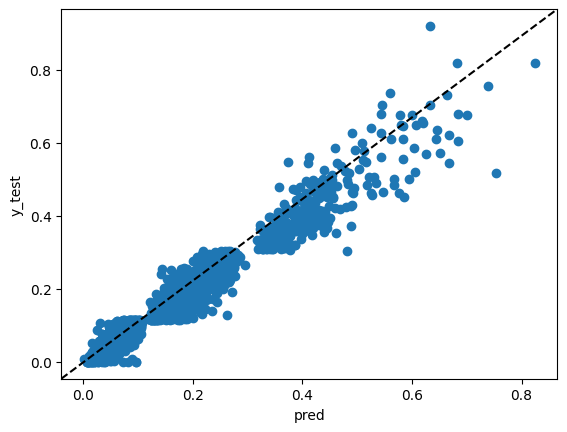

In [ ]:
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: RandomForestRegressor(), MAE: 0.011576025960810228, MSE: 0.0003844820645374027, RMSE: 0.019608214210819982


### Model Optimization

In [22]:
from sklearn.model_selection import RandomizedSearchCV
# Create the random grid
param_grid = {
    'n_estimators': [5,20,50,100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(5, 50, num = 10)],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

In [25]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = param_grid,
               n_iter = 20, cv = 2, verbose=2, random_state=35, n_jobs = 2)

In [ ]:
rf_random.fit(x_train, y_train)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [ ]:
print(rf_random.best_estimator_)

RandomForestRegressor(max_depth=30, max_features='auto', min_samples_leaf=4)


In [ ]:
best_random = rf_random.best_estimator_
pred = best_random.predict(x_val)
mean_squared_error(y_val, pred)

0.00039664684937796755

In [28]:
best_random = RandomForestRegressor(max_depth=30, min_samples_leaf=4)
best_random.fit(x_train, y_train.values.ravel())
pred = best_random.predict(x_val)
mean_absolute_error(y_val, pred)

0.011985566601538919

## 6. Decision Tree

In [ ]:
df.iloc[5]['Model']

DecisionTreeRegressor()

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_val)

Text(0, 0.5, 'y_test')

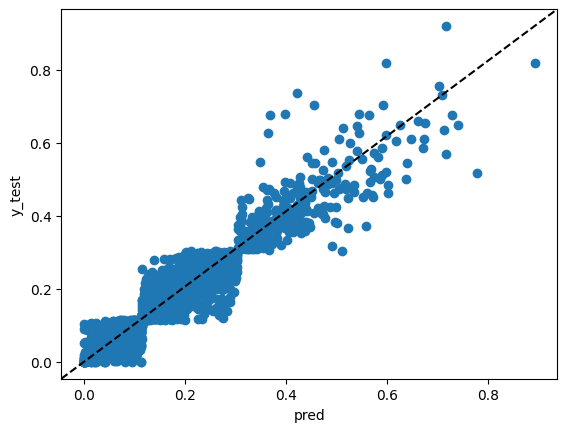

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: DecisionTreeRegressor(), MAE: 0.014113998894662505, MSE: 0.0006446985257299203, RMSE: 0.025390914235803332


### Model Optimization

In [29]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,2,3],
            "min_samples_leaf":[1,3,5,7,9],
           "min_weight_fraction_leaf":[0.2,0.4,0.5],
           "max_features":["log2","sqrt",None], #"auto"
           "max_leaf_nodes":[None,5,10,15,20] }



In [30]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV
tuning_model=GridSearchCV(DecisionTreeRegressor(),param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
print(tuning_model.fit(x_train, y_train).best_estimator_)

print('MAE: %.6f' % tuning_model.best_score_)
print('Config: %s' % tuning_model.best_params_)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=5,
                      min_weight_fraction_leaf=0.2)
MAE: -0.004313
Config: {'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'}


In [31]:
# print best parameter after tuning
print(tuning_model.best_params_)
print(tuning_model.best_estimator_)

{'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_weight_fraction_leaf': 0.2, 'splitter': 'best'}
DecisionTreeRegressor(max_depth=3, min_samples_leaf=5,
                      min_weight_fraction_leaf=0.2)


In [33]:
best_dt = DecisionTreeRegressor(max_depth= 3, min_samples_leaf=5, min_weight_fraction_leaf=0.2, splitter='best')
best_dt.fit(x_train, y_train)
pred = best_dt.predict(x_val)
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [34]:
print(f'Model: {best_dt}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: DecisionTreeRegressor(max_depth=3, min_samples_leaf=5,
                      min_weight_fraction_leaf=0.2), MAE: 0.03764100854057388, MSE: 0.003944785551834194, RMSE: 0.0628075278277548


## 7. SVR

In [36]:
model = svm.SVR()
model.fit(x_train, y_train.values.ravel())
pred = model.predict(x_val)

Text(0, 0.5, 'y_test')

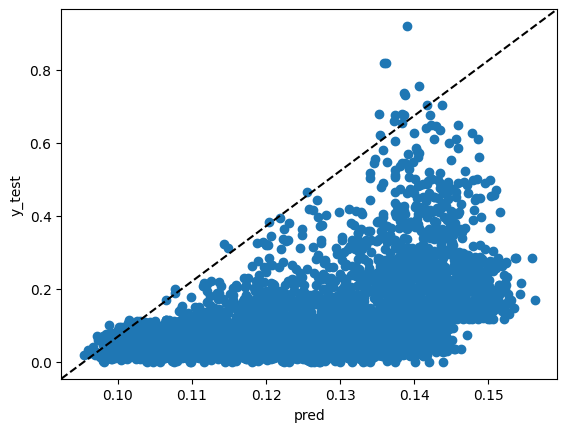

In [37]:
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [39]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: SVR(), MAE: 0.07813155234103776, MSE: 0.009934864012147672, RMSE: 0.09967378798935893


## 8. Gradient Boosting

In [43]:
df.iloc[7]['Model']

GradientBoostingRegressor(random_state=0)

In [44]:
model = GradientBoostingRegressor(random_state=0)
model.fit(x_train, y_train.values.ravel())
pred = model.predict(x_val)

Text(0, 0.5, 'y_test')

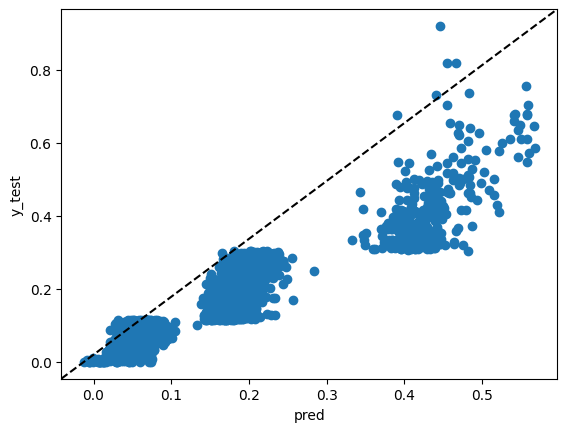

In [45]:
import matplotlib.pyplot as plt
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [46]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [47]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: GradientBoostingRegressor(random_state=0), MAE: 0.022052301363211874, MSE: 0.0010548369965773315, RMSE: 0.03247825421073817


### Model Optimization

In [48]:
#crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
GBR=GradientBoostingRegressor(random_state=0)
search_grid={'n_estimators':range(20,81,10),'learning_rate':[0.02]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [49]:
search.fit(x_train, y_train.values.ravel())
# print best parameter after tuning
print(search.best_params_)

# print how our model looks after hyper-parameter tuning
print(search.best_estimator_)

{'learning_rate': 0.02, 'n_estimators': 80}
GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)


In [50]:
best_gbm = GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)
best_gbm.fit(x_train, y_train.values.ravel())
pred = best_gbm.predict(x_val)

In [51]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [52]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: GradientBoostingRegressor(random_state=0), MAE: 0.028737039190781584, MSE: 0.0017476203414720092, RMSE: 0.04180454929157841


## 9. XGB

In [53]:
df.iloc[8]['Model']

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
model = XGBRegressor()
model.fit(x_train, y_train.values.ravel())
pred = model.predict(x_val)

Text(0, 0.5, 'y_test')

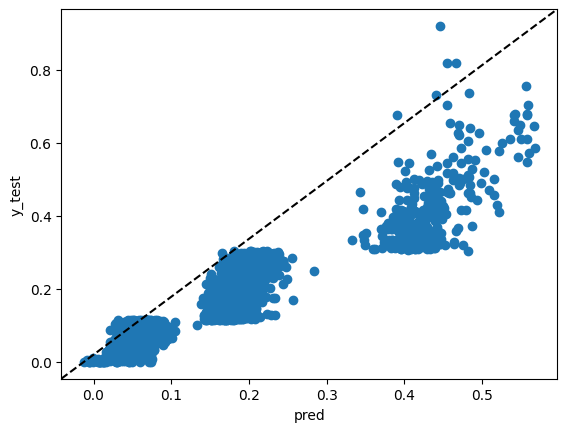

In [55]:
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [56]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [57]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: GradientBoostingRegressor(), MAE: 0.022052301363211874, MSE: 0.0010548369965773315, RMSE: 0.03247825421073817


### Model Optimization

In [58]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 10],
        'n_estimators' : [50, 75, 100],
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train.values.ravel())

    return gsearch.best_params_

In [59]:
result = hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


KeyboardInterrupt: 

The result was found as {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}

In [60]:
model = XGBRegressor(learning_rate= 0.1, max_depth =  10, n_estimators = 100)
model.fit(x_train, y_train.values.ravel())
pred = model.predict(x_val)

In [61]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [62]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: GradientBoostingRegressor(max_depth=10), MAE: 0.011999462298922901, MSE: 0.00038613173184762374, RMSE: 0.01965023490566013


## 10. EBM

In [ ]:
df.iloc[9]['Model']

In [ ]:
model = ExplainableBoostingRegressor()
model.fit(x_train, y_train)

ExplainableBoostingRegressor()

In [ ]:
for parameter in model.get_params():
    print(parameter)

binning
early_stopping_rounds
early_stopping_tolerance
feature_names
feature_types
inner_bags
interactions
learning_rate
mains
max_bins
max_interaction_bins
max_leaves
max_rounds
min_samples_leaf
n_jobs
outer_bags
random_state
validation_size


In [ ]:
pred = model.predict(x_val)
pred

array([0.03570677, 0.06432728, 0.03874226, ..., 0.24080696, 0.03508324,
       0.19610471])

In [ ]:
model = ExplainableBoostingRegressor()
model.fit(x_train, y_train)
pred = model.predict(x_val)

Text(0, 0.5, 'y_test')

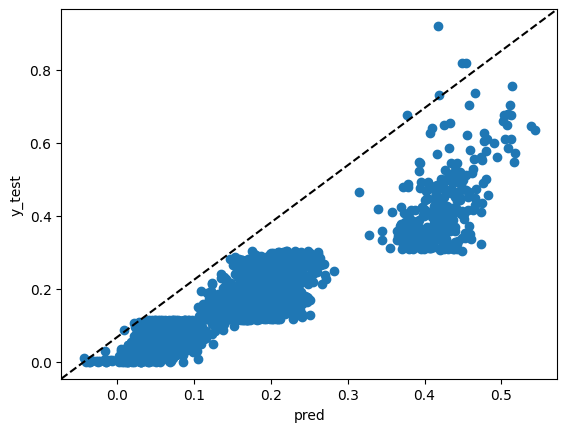

In [ ]:
plt.scatter(pred, y_val, label='medv')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('y_test')

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: ExplainableBoostingRegressor(), MAE: 0.023144068988931343, MSE: 0.0011730699389010438, RMSE: 0.034250108596923366


###Hyperparameter tuning

In [ ]:
interactions = [5, 10, 15, 20, 25]
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'interactions': interactions
    }

    ebm_model = ExplainableBoostingRegressor()

    gsearch = GridSearchCV(estimator = ebm_model,
                           param_grid = param_tuning,
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)
    return gsearch.best_params_

In [ ]:
result = hyperParameterTuning(x_train, y_train)
result

Fitting 3 folds for each of 5 candidates, totalling 15 fits


{'interactions': 25}

In [ ]:
model = ExplainableBoostingRegressor(interactions=100)
model.fit(x_train, y_train)
pred = model.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = sqrt(mse)

In [ ]:
print(f'Model: {model}, MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

Model: ExplainableBoostingRegressor(interactions=100), MAE: 0.02239728250443253, MSE: 0.0011113841050210784, RMSE: 0.03333742799048958


#Final models df

In [63]:
models_list = [['Linear Regression', 0.04182871690492889, 0.004630361496347768, 0.06804675963150462 ],
        ['Ridge Regression', 0.041825067432623805, 0.004630324936440637, 0.06804649099285456],
        ['Lasso Regression', 0.06658166506829111, 0.009231487561364667, 0.0960806305212693],
        ['KNeighborsRegressor', 0.018234904440547893, 0.0011430408868409864, 0.03380888769008804 ],
        ['RandomForestRegressor', 0.012023576713607263, 0.00039664684937796755, 0.019915994],
        ['DecisionTreeRegressor', 0.03764100854057386, 0.003944785551834193, 0.0628075278277548],
        ['SVR()', 'NA', 'NA', 'NA'],
        ['GradientBoostingRegressor', 0.028737039190781584, 0.001747620341472009, 0.04180454929157841],
        ['XGB', 0.011987637828854413, 0.00038463141543533595, 0.0196120222168785],
        ['ExplainableBoostingRegressor', 0.02239728250443253, 0.0011113841050210784, 0.03333742799048958]
        ]


In [65]:
import pandas as pd
df = pd.DataFrame(models_list, columns = ['Model', 'MAE', 'MSE', 'RMSE'])
df

,Model,MAE,MSE,RMSE
0,Linear Regression,0.041829,0.00463,0.068047
1,Ridge Regression,0.041825,0.00463,0.068046
2,Lasso Regression,0.066582,0.009231,0.096081
3,KNeighborsRegressor,0.018235,0.001143,0.033809
4,RandomForestRegressor,0.012024,0.000397,0.019916
5,DecisionTreeRegressor,0.037641,0.003945,0.062808
6,SVR(),NA,NA,NA
7,GradientBoostingRegressor,0.028737,0.001748,0.041805
8,XGB,0.011988,0.000385,0.019612
9,ExplainableBoostingRegressor,0.022397,0.001111,0.033337


In [ ]:
df.to_csv('Tuned_model_results_new.csv')